In [1238]:
import numpy as np              # для матриц и математики
import pandas as pd             # для работы с табличками
from scipy import stats         # для работы со статистикой
import matplotlib.pyplot as plt # для визуализации
import statsmodels as sm

# для скачивания информации с html-страниц
import requests 
from bs4 import BeautifulSoup

### 2. Скачаем датасет с ценой на нефть марки Brent с 1999 года по 2022 год:

In [384]:
URL = 'https://worldtable.info/yekonomika/cena-na-neft-marki-brent-tablica-s-1986-po-20.html?ysclid=l9e4pvjjpm293058322'
response = requests.get(URL)
soup = BeautifulSoup(response.text,'html.parser')

table = soup.find('table').tbody
rows = table.find_all('tr')
columns = [v.text.replace('\n','') for v in rows[0].find_all('th')]

df = pd.DataFrame(columns=columns)

for i in range(1,len(rows)):
    tds = rows[i].find_all('td')

    if len(tds)==4:
        values = [tds[0].text, tds[1].text, tds[2].text, tds[3].text.replace('\n',''.replace('\xa0',''))]
    else:
        values = [td.text.replace('\n',''.replace('\xa0','')) for td in tds]

    df = df.append(pd.Series(values, index=['Date', 'Mean price', 'Changing']), ignore_index=True)

    df.to_csv('oil_price.csv',index=False)

### 3.

In [673]:
ruble_rate_df = pd.read_excel('./reer_neer.xlsx')
ruble_rate_df.columns = ['month', 'reer', 'neer']
ruble_rate_df

,month,reer,neer
0,1999M01,43.385484,106.584831
1,1999M02,45.554806,108.700998
2,1999M03,47.214643,110.850913
3,1999M04,46.592002,107.367164
4,1999M05,48.068810,109.411444
...,...,...,...
272,2021M09,80.556561,57.457116
273,2021M10,83.118523,59.047686
274,2021M11,82.959720,58.781660
275,2021M12,82.914997,58.606605


Приведем столбец `Month` к типу `datetime64`:

In [674]:
ruble_rate_df['month'] = ruble_rate_df['month'].replace({'M01': '-01-01'}, regex=True)
ruble_rate_df['month'] = ruble_rate_df['month'].replace({'M02': '-02-01'}, regex=True)
ruble_rate_df['month'] = ruble_rate_df['month'].replace({'M03': '-03-01'}, regex=True)
ruble_rate_df['month'] = ruble_rate_df['month'].replace({'M04': '-04-01'}, regex=True)
ruble_rate_df['month'] = ruble_rate_df['month'].replace({'M05': '-05-01'}, regex=True)
ruble_rate_df['month'] = ruble_rate_df['month'].replace({'M06': '-06-01'}, regex=True)
ruble_rate_df['month'] = ruble_rate_df['month'].replace({'M07': '-07-01'}, regex=True)
ruble_rate_df['month'] = ruble_rate_df['month'].replace({'M08': '-08-01'}, regex=True)
ruble_rate_df['month'] = ruble_rate_df['month'].replace({'M09': '-09-01'}, regex=True)
ruble_rate_df['month'] = ruble_rate_df['month'].replace({'M10': '-10-01'}, regex=True)
ruble_rate_df['month'] = ruble_rate_df['month'].replace({'M11': '-11-01'}, regex=True)
ruble_rate_df['month'] = ruble_rate_df['month'].replace({'M12': '-12-01'}, regex=True)

In [676]:
ruble_rate_df['month'] = ruble_rate_df['month'].astype('datetime64')

Обрежем данные по дате (1999-2021):

In [677]:
ruble_rate_df = ruble_rate_df[(ruble_rate_df['month'] >= '01-01-1999') & (ruble_rate_df['month'] < '01-01-2022')]

### 4.

In [680]:
oil_price_df = pd.read_csv('./oil_price.csv')
oil_price_df = oil_price_df.drop(columns=['Changing'])
oil_price_df.columns = ['month', 'poil']
oil_price_df.head()

,month,poil
0,февраль 1986,17.32
1,март 1986,13.85
2,апрель 1986,12.48
3,май 1986,14.05
4,июнь 1986,11.90


Приведем столбец `Month` к типу `datetime64`:

In [681]:
oil_price_df['month'] = oil_price_df['month'].replace({'январь ': '01-'}, regex=True)
oil_price_df['month'] = oil_price_df['month'].replace({'февраль ': '02-'}, regex=True)
oil_price_df['month'] = oil_price_df['month'].replace({'март ': '03-'}, regex=True)
oil_price_df['month'] = oil_price_df['month'].replace({'апрель ': '04-'}, regex=True)
oil_price_df['month'] = oil_price_df['month'].replace({'май ': '05-'}, regex=True)
oil_price_df['month'] = oil_price_df['month'].replace({'июнь ': '06-'}, regex=True)
oil_price_df['month'] = oil_price_df['month'].replace({'июль ': '07-'}, regex=True)
oil_price_df['month'] = oil_price_df['month'].replace({'август ': '08-'}, regex=True)
oil_price_df['month'] = oil_price_df['month'].replace({'сентябрь ': '09-'}, regex=True)
oil_price_df['month'] = oil_price_df['month'].replace({'октябрь ': '10-'}, regex=True)
oil_price_df['month'] = oil_price_df['month'].replace({'ноябрь ': '11-'}, regex=True)
oil_price_df['month'] = oil_price_df['month'].replace({'декабрь ': '12-'}, regex=True)

In [682]:
oil_price_df = oil_price_df[oil_price_df['month'] != '03-2020 (16-31 марта)']
oil_price_df['month'] = oil_price_df['month'].replace({'03-2020 (1-15 марта)': '03-2020'}, regex=False)

In [683]:
oil_price_df['month'] = oil_price_df['month'].astype('datetime64')

Обрежем данные по дате (1999-2021):

In [684]:
oil_price_df = oil_price_df[(oil_price_df['month'] >= '01-01-1999') & (oil_price_df['month'] < '01-01-2022')]

### 4. Соединение таблиц

In [686]:
df = pd.merge(ruble_rate_df, oil_price_df, how = 'inner', on = 'month')
df = df.set_index('month')
df.head(3)

,reer,neer,poil
month,,,
1999-01-01,43.385484,106.584831,10.95
1999-02-01,45.554806,108.700998,10.20
1999-03-01,47.214643,110.850913,12.12


Создадим дополнительные нужные нам столбцы, а именно:
1. `log_reer` - отлогарифмированный реальный эффективный курс рубля.
3. `log_poil` - отлогарифмированная цена на нефть в рублях.

In [687]:
df['log_reer'] = df['reer'].apply(lambda x: np.log(x))
df['log_poil'] = df['poil'].apply(lambda x: np.log(x))

In [688]:
df.head(3)

,reer,neer,poil,log_reer,log_poil
month,,,,,
1999-01-01,43.385484,106.584831,10.95,3.770125,2.393339
1999-02-01,45.554806,108.700998,10.20,3.818916,2.322388
1999-03-01,47.214643,110.850913,12.12,3.854704,2.494857


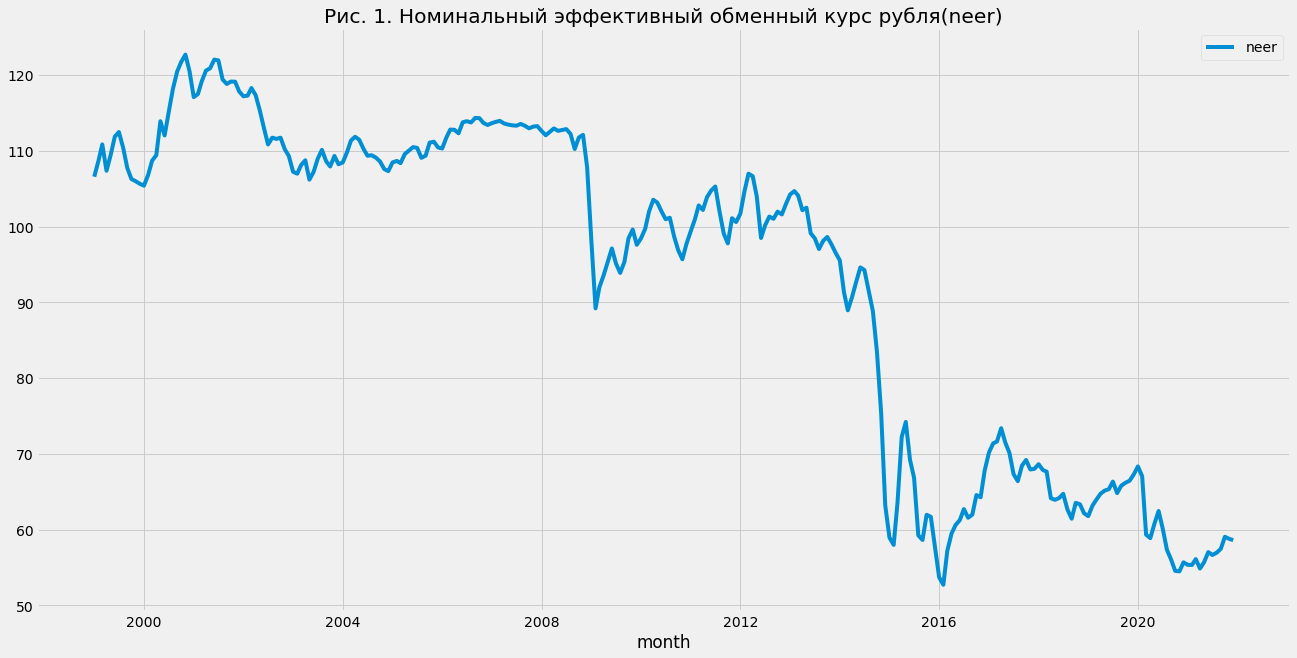

In [926]:
plt.figure(figsize=(20,10))
plt.plot(df['neer'], label='neer')
plt.legend()
plt.xlabel('month')
plt.title('Рис. 1. Номинальный эффективный обменный курс рубля(neer)')
None

Построим теперь графики:

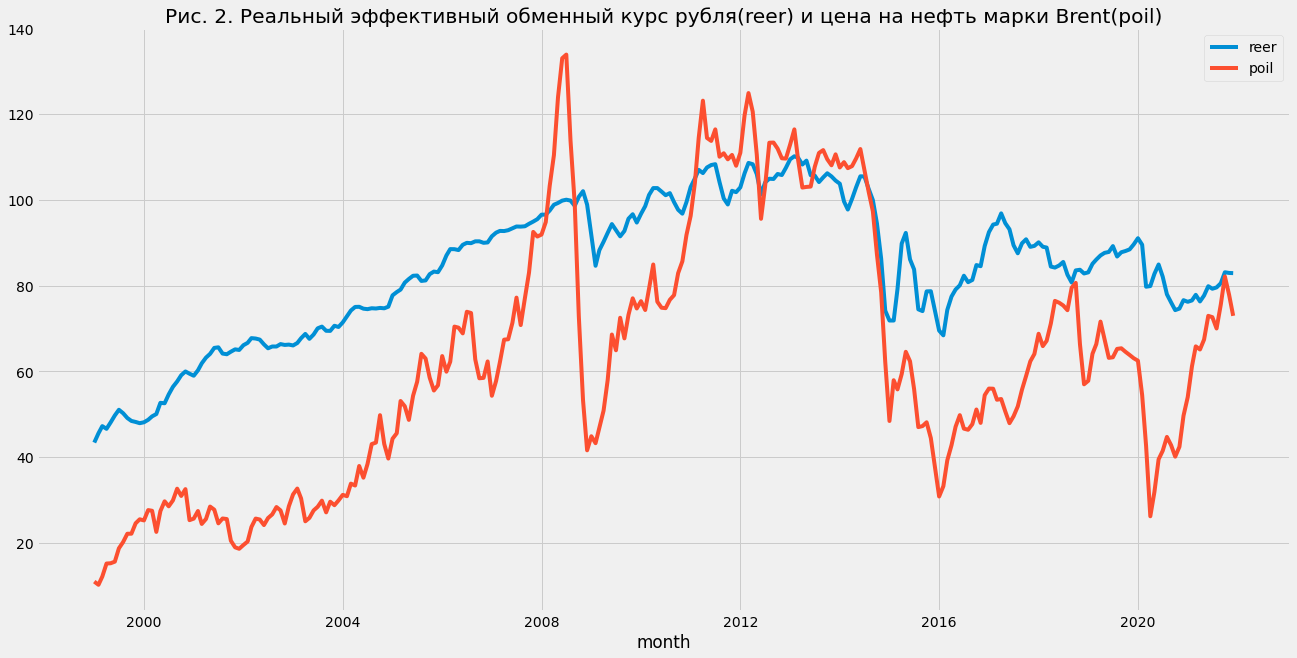

In [927]:
plt.figure(figsize=(20,10))
plt.plot(df['reer'], label='reer')
plt.plot(df['poil'], label='poil')
plt.legend()
plt.xlabel('month')
plt.title('Рис. 2. Реальный эффективный обменный курс рубля(reer) и цена на нефть марки Brent(poil)')
None

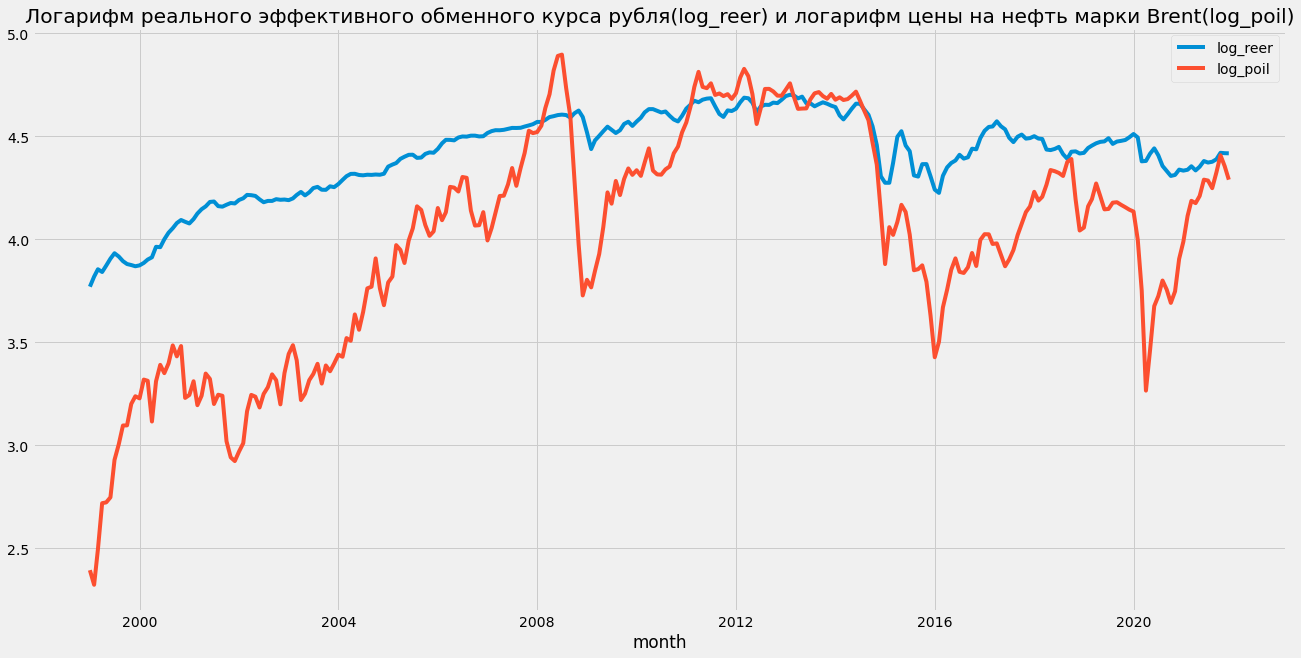

In [692]:
plt.figure(figsize=(20,10))
plt.plot(df['log_reer'], label='log_reer')
plt.plot(df['log_poil'], label='log_poil')
plt.legend()
plt.xlabel('month')
plt.title('Логарифм реального эффективного обменного курса рубля(log_reer) и логарифм цены на нефть марки Brent(log_poil)')
None

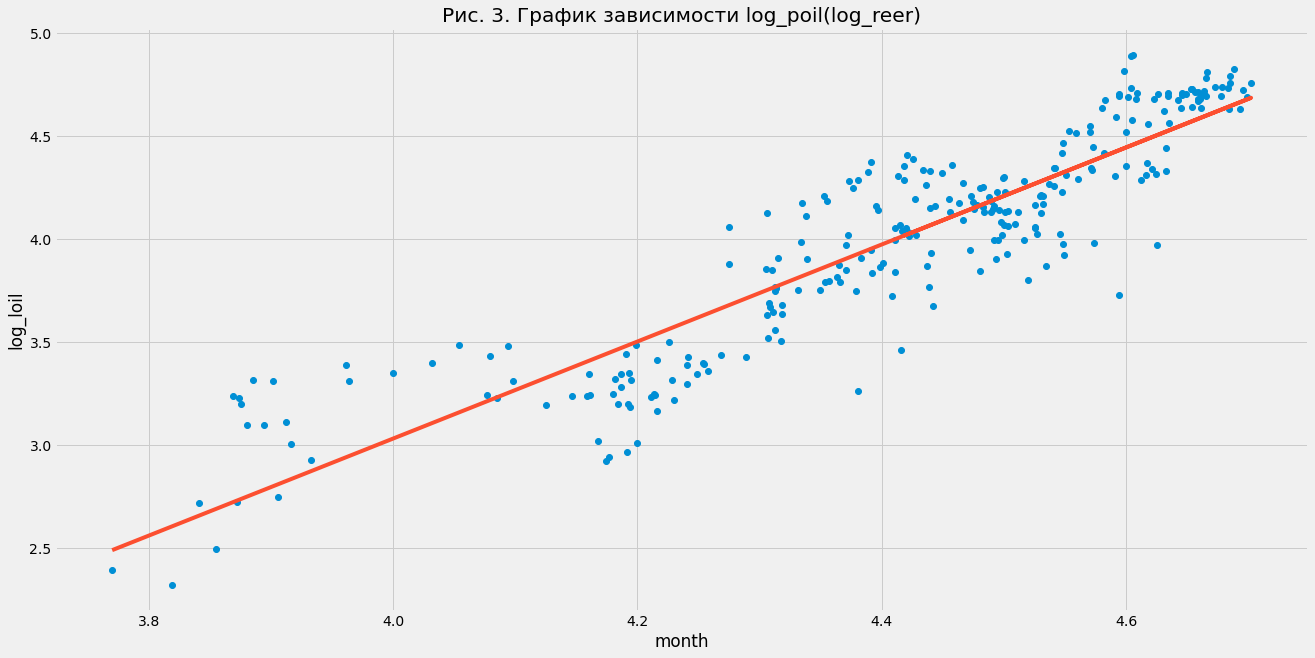

In [928]:
p = np.polyfit(df['log_reer'], df['log_poil'] ,1)


plt.figure(figsize=(20,10))
plt.plot(df['log_reer'], df['log_poil'], 'o')
plt.plot(df['log_reer'], np.polyval(p, df['log_reer']))
plt.ylabel('log_loil')
plt.xlabel('log_reer')
plt.xlabel('month')
plt.title('Рис. 3. График зависимости log_poil(log_reer)')
None

### 5. Проверка стационарности

!!! Написать, что такое ADF тест!!!

1) Для `reer`. 

!! Написать, что мы тут проверяем, как тут https://habr.com/ru/post/207160/

In [695]:
df.head(3)

,reer,neer,poil,log_reer,log_poil
month,,,,,
1999-01-01,43.385484,106.584831,10.95,3.770125,2.393339
1999-02-01,45.554806,108.700998,10.20,3.818916,2.322388
1999-03-01,47.214643,110.850913,12.12,3.854704,2.494857


In [931]:
test = sm.tsa.stattools.adfuller(df['reer'])
print('Таблица 1. Результаты ADF-теста на стационарность reer_t.')
print('adf: ', test[0]) 
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']: 
    print('Есть единичные корни, ряд не стационарен.')
else:
    print('Единичных корней нет, ряд стационарен.')

Таблица 1. Результаты ADF-теста на стационарность reer_t.
adf:  -2.485314380606089
p-value:  0.11908850504075452
Critical values:  {'1%': -3.4546223782586534, '5%': -2.8722253212300277, '10%': -2.5724638500216264}
Есть единичные корни, ряд не стационарен.


In [697]:
diff1 = df['reer'].diff(periods=1).dropna()

In [933]:
test = sm.tsa.stattools.adfuller(diff1)
print('Таблица 2. Результаты ADF-теста на стационарность d_reer_t.')
print('adf: ', test[0]) 
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']: 
    print('Есть единичные корни, ряд не стационарен.')
else:
    print('Единичных корней нет, ряд стационарен.')

Таблица 2. Результаты ADF-теста на стационарность d_reer_t.
adf:  -14.395833444540207
p-value:  8.670915605152275e-27
Critical values:  {'1%': -3.4544435065994437, '5%': -2.8721468827772774, '10%': -2.572422013959188}
Единичных корней нет, ряд стационарен.


!! Написать вывод !!

2) Для `poil`:

!! Написать, что мы тут проверяем, как тут https://habr.com/ru/post/207160/

In [935]:
test = sm.tsa.stattools.adfuller(df['poil'])
print('Таблица 3. Результаты ADF-теста на стационарность poil_t.')
print('adf: ', test[0]) 
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']: 
    print('Есть единичные корни, ряд не стационарен.')
else:
    print('Единичных корней нет, ряд стационарен.')

Таблица 3. Результаты ADF-теста на стационарность poil_t.
adf:  -2.6553424925967124
p-value:  0.08208984229562821
Critical values:  {'1%': -3.4544435065994437, '5%': -2.8721468827772774, '10%': -2.572422013959188}
Есть единичные корни, ряд не стационарен.


In [700]:
diff1 = df['poil'].diff(periods=1).dropna()

In [936]:
test = sm.tsa.stattools.adfuller(diff1)
print('Таблица 4. Результаты ADF-теста на стационарность d_poil_t.')
print('adf: ', test[0]) 
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']: 
    print('Есть единичные корни, ряд не стационарен.')
else:
    print('Единичных корней нет, ряд стационарен.')

Таблица 4. Результаты ADF-теста на стационарность d_poil_t.
adf:  -14.395833444540207
p-value:  8.670915605152275e-27
Critical values:  {'1%': -3.4544435065994437, '5%': -2.8721468827772774, '10%': -2.572422013959188}
Единичных корней нет, ряд стационарен.


!! Написать вывод !!

3) Регрессия на отлогарифмированных величинах:

Нам надо понять, имеет ли место для некоторого $b$:
$$log\_reer_t - b\cdot log\_poil_t\sim I(0)$$
Или же:
$$\forall b:~log\_reer_t - b\cdot log\_poil_t\sim I(1)$$
Для этого оценим параметр $b$ методом наименьших квадратов: 
$$b=\frac{cov(log\_reer_t,log\_poil_t)}{var(log\_poil_t)}$$

In [702]:
df.cov()

,reer,neer,poil,log_reer,log_poil
reer,259.242147,-37.777093,427.223124,3.360637,8.055245
neer,-37.777093,472.725586,-34.291027,-0.716410,-2.150924
poil,427.223124,-34.291027,899.062297,5.366354,15.682673
log_reer,3.360637,-0.716410,5.366354,0.044261,0.104321
log_poil,8.055245,-2.150924,15.682673,0.104321,0.296854


In [1130]:
b = 0.104321 / 0.296854

In [938]:
reg = df['log_reer'] - b * df['log_poil']
test = sm.tsa.stattools.adfuller(reg)
print('Таблица 5. Результаты ADF-теста на стационарность log(reer_t)-b log(poil_t).')
print('adf: ', test[0]) 
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']: 
    print('Есть единичные корни, ряд не стационарен.')
else:
    print('Единичных корней нет, ряд стационарен.')

Таблица 5. Результаты ADF-теста на стационарность log(reer_t)-b log(poil_t).
adf:  -3.965611495212391
p-value:  0.0016016797829541064
Critical values:  {'1%': -3.4544435065994437, '5%': -2.8721468827772774, '10%': -2.572422013959188}
Единичных корней нет, ряд стационарен.


Значит, ряды `log_reer` и `log_poil` коинтегрированы.

### 6. Построение моделей

Обозначим:  `df['log_reer']`=$y_t$, `df['log_poil']`=$x_t$. Тогда по результатам тестов из предыдущего пункта мы получили: $y_t\sim I(1)$ (т.е. это интегрированная переменная порядка 1), $x_t\sim I(1)$ (т.е. это интегрированная переменная порядка 1), связь этих временных рядов **паразитная** 
(т.е. $\forall b: y_t-bx_t\sim I(1)$).

1) Модель для данных t < ноябрь 2014 года:

In [1209]:
df1 = df[:'2014-10-01']
df1.head(10)

,reer,neer,poil,log_reer,log_poil
month,,,,,
1999-01-01,43.385484,106.584831,10.95,3.770125,2.393339
1999-02-01,45.554806,108.700998,10.20,3.818916,2.322388
1999-03-01,47.214643,110.850913,12.12,3.854704,2.494857
1999-04-01,46.592002,107.367164,15.16,3.841429,2.718660
1999-05-01,48.068810,109.411444,15.22,3.872634,2.722610
1999-06-01,49.708848,111.877942,15.60,3.906183,2.747271
1999-07-01,51.032449,112.482726,18.71,3.932462,2.929058
1999-08-01,50.229686,110.426724,20.17,3.916606,3.004196
1999-09-01,49.110186,107.717879,22.11,3.894066,3.096030


In [1197]:
z = df1['log_reer'] - b * df1['log_poil']
z = z - z.mean()

y = df1['log_reer'].to_numpy()
x = df1['log_poil'].to_numpy()
dy = df1['log_reer'].diff(periods=1).to_numpy()
dx = df1['log_poil'].diff(periods=1).to_numpy()

In [1198]:
X = [np.ones(df1.shape[0]-6),z[6:],dx[6:],dx[5:-1],dx[4:-2],dx[3:-3],dx[2:-4],dx[1:-5],
     dy[5:-1],dy[4:-2],dy[3:-3],dy[2:-4],dy[1:-5]]
Y = dy[6:]

X = np.array(X).T
X = pd.DataFrame(X)
X.columns = ['const', 'z_t', 'dx_t', 'dx_{t-1}', 'dx_{t-2}', 'dx_{t-3}', 'dx_{t-4}', 'dx_{t-5}',
             'dy_{t-1}', 'dy_{t-2}', 'dy_{t-3}', 'dy_{t-4}', 'dy_{t-5}']

In [1199]:
model = sm.api.OLS(Y, X[['const', 'z_t', 'dx_t', 'dx_{t-1}', 'dx_{t-2}', 'dx_{t-3}', 'dx_{t-4}', 'dx_{t-5}',
             'dy_{t-1}', 'dy_{t-2}', 'dy_{t-3}', 'dy_{t-4}', 'dy_{t-5}']])
results = model.fit()
print('Таблица 6. Результаты оценивания на 1-ом интервале(t<2014M11).\n')
print(results.summary())

Таблица 6. Результаты оценивания на 1-ом интервале(t<2014M11).

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     4.850
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           7.58e-07
Time:                        18:56:47   Log-Likelihood:                 497.97
No. Observations:                 184   AIC:                            -969.9
Df Residuals:                     171   BIC:                            -928.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

Создадим временной ряд, который будет содержать предсказания нашей модели(величины `log_reer`) на 1-ом промежутке:

In [1218]:
dy_pred = results.predict()

y_pred = np.zeros(185)
y_pred[0] = y[5]
for i in range(184):
    y_pred[i+1] = y_pred[i] + dy_pred[i]
    
df1_ = df1['1999-06-01':]
df1_['pred'] = y_pred

/var/folders/tx/jc8_0sl92klfzzmp_l613pxc0000gn/T/ipykernel_57946/789251359.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_['pred'] = y_pred


2) Модель для данных ноябрь 2014 года <= t < февраль 2017 года:

In [1222]:
df2 = df['2014-05-01':]
df2

,reer,neer,poil,log_reer,log_poil
month,,,,,
2014-05-01,102.953373,92.675506,109.68,4.634276,4.697567
2014-06-01,105.505757,94.613273,111.87,4.658766,4.717337
2014-07-01,105.476199,94.257899,106.98,4.658485,4.672642
2014-08-01,102.596159,91.582467,101.92,4.630800,4.624188
2014-09-01,99.952462,88.840317,97.34,4.604695,4.578210
...,...,...,...,...,...
2021-08-01,79.580192,56.940574,70.00,4.376765,4.248495
2021-09-01,80.556561,57.457116,75.59,4.388960,4.325324
2021-10-01,83.118523,59.047686,82.13,4.420268,4.408303


In [1223]:
z = df2['log_reer'] - b * df2['log_poil']
z = z - z.mean()

y = df2['log_reer'].to_numpy()
x = df2['log_poil'].to_numpy()
dy = df2['log_reer'].diff(periods=1).to_numpy()
dx = df2['log_poil'].diff(periods=1).to_numpy()

In [1224]:
X = [np.ones(df2.shape[0]-6),z[6:],dx[6:],dx[5:-1],dx[4:-2],dx[3:-3],dx[2:-4],dx[1:-5],
     dy[5:-1],dy[4:-2],dy[3:-3],dy[2:-4],dy[1:-5]]
Y = dy[6:]

X = np.array(X).T
X = pd.DataFrame(X)
X.columns = ['const', 'z_t', 'dx_t', 'dx_{t-1}', 'dx_{t-2}', 'dx_{t-3}', 'dx_{t-4}', 'dx_{t-5}',
             'dy_{t-1}', 'dy_{t-2}', 'dy_{t-3}', 'dy_{t-4}', 'dy_{t-5}']

In [1225]:
model = sm.api.OLS(Y, X[['const', 'z_t', 'dx_t', 'dx_{t-1}', 'dx_{t-2}', 'dx_{t-3}', 'dx_{t-4}', 'dx_{t-5}',
             'dy_{t-1}', 'dy_{t-2}', 'dy_{t-3}', 'dy_{t-4}', 'dy_{t-5}']])
results = model.fit()
print('Таблица 7. Результаты оценивания на 2-ом интервале(t>=2014M11).\n')
print(results.summary())

Таблица 7. Результаты оценивания на 2-ом интервале(t>=2014M11).

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     4.546
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           1.96e-05
Time:                        19:15:25   Log-Likelihood:                 177.05
No. Observations:                  86   AIC:                            -328.1
Df Residuals:                      73   BIC:                            -296.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Создадим временной ряд, который будет содержать предсказания нашей модели(величины `log_reer`) на 2-ом промежутке:

In [1229]:
dy_pred = results.predict()

y_pred = np.zeros(87)
y_pred[0] = y[5]
for i in range(86):
    y_pred[i+1] = y_pred[i] + dy_pred[i]
    
df2_ = df2['2014-10-01':]
df2_['pred'] = y_pred

/var/folders/tx/jc8_0sl92klfzzmp_l613pxc0000gn/T/ipykernel_57946/2819234888.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_['pred'] = y_pred


3) Построим итоговый график предсказания нашей модели(для сравнения приведена реальный временной ряд `log_reer`):

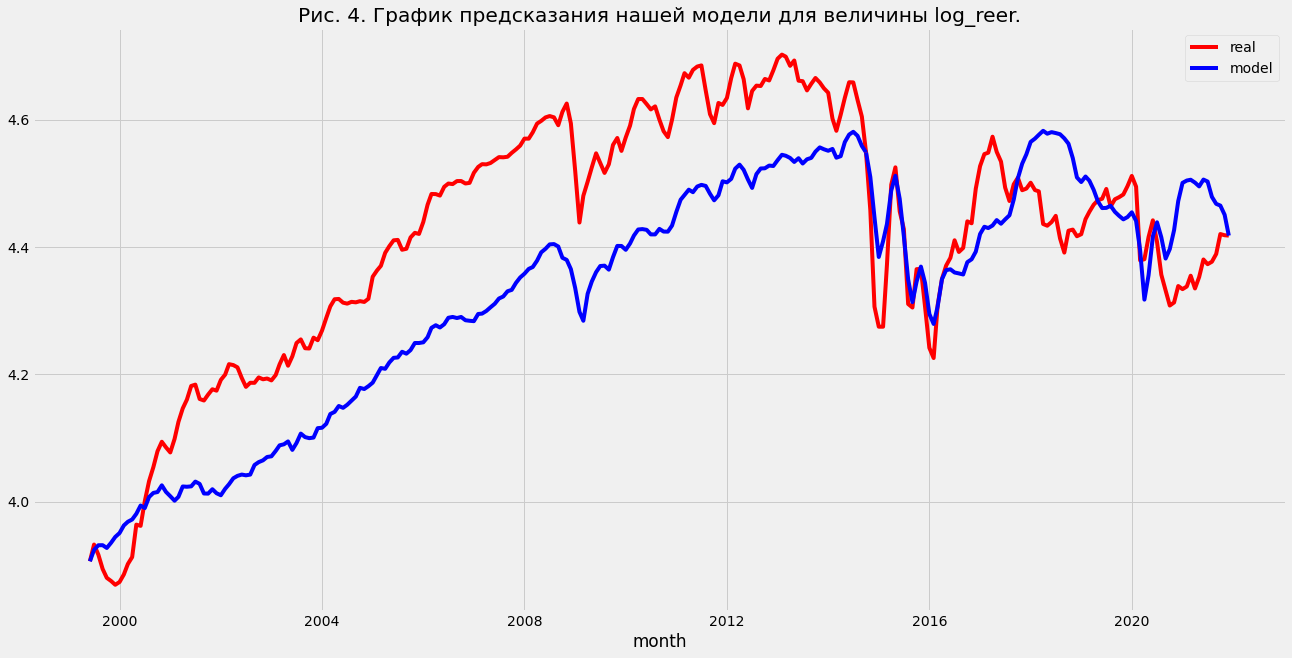

In [1237]:
plt.figure(figsize=(20,10))

plt.plot(df1_['log_reer'], 'r', label='real')
plt.plot(df1_['pred'], 'b', label='model')
plt.plot(df2_['log_reer'], 'r')
plt.plot(df2_['pred'], 'b')
plt.legend()
plt.xlabel('month')
plt.title('Рис. 4. График предсказания нашей модели для величины log_reer.')

None